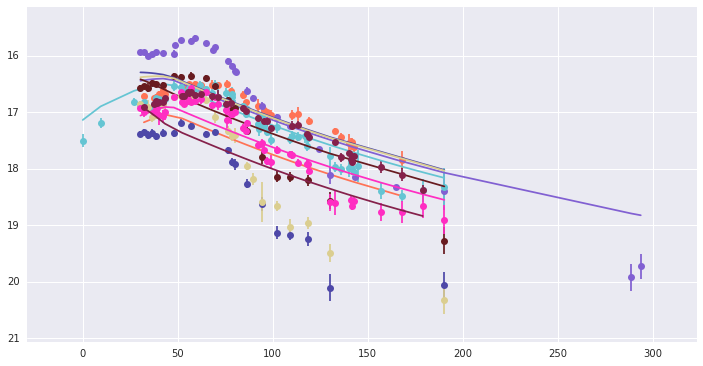

In [65]:
%matplotlib inline

import json
import matplotlib.pyplot as plt
from friendlyfit.plotting import bandcolorf

with open('products/lc.json', 'r') as f:
    data = json.loads(f.read())

band_names = list(set(data['bands']))

fig = plt.figure(figsize=(12,6))
for band in band_names:
    xs, ys = zip(*[
        [x, y] for x, y, z in
        zip(data['times'], data['model_magnitudes'], data['bands'])
        if z == band])
    plt.plot(xs, ys, c=bandcolorf(band))
    xs, ys, yes = zip(*[
        [x, y, ye] for x, y, ye, z in
        zip(data['times'], data['magnitudes'], data['e_magnitudes'], data['bands'])
        if z == band])
    plt.errorbar(xs, ys, yerr=yes, c=bandcolorf(band), fmt='o')
plt.gca().invert_yaxis()
plt.margins(0.1,0.1)
plt.show()
fig.savefig('products/lc.png')